In [103]:
### basic package for data science project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

#### Thoughts: 
    - Since data dictionary is not provided, it is hard to tell the meaning of numerical features
    - Given a large amount of features,  I think it is best to first seperate the categorical fts and numerical fts. 
    
#### For numerical features: 
    - Exclude columns with more than 75% of the values missing
    - Impute missing values with mean/median/mode
#### For categorical features: 
    - Focus on understand the features 
    - Creat dummy variable to represent the feature in an appropriate format for training data 

### Data summary 

In [51]:
df = pd.read_csv("data/exercise_40_train.csv")
df.describe()

,y,x1,x2,x4,x5,x6,x8,x9,x10,x11,...,x89,x90,x91,x92,x94,x95,x96,x97,x98,x100
count,40000.000000,40000.000000,40000.000000,40000.000000,37572.000000,40000.000000,40000.000000,40000.000000,40000.000000,34890.000000,...,29309.000000,40000.000000,34741.000000,37565.000000,37660.000000,27396.000000,33362.000000,40000.000000,40000.000000,40000.000000
mean,0.145075,2.999958,20.004865,0.002950,0.005396,0.007234,0.004371,2.722334,0.490339,100.008988,...,10.767838,3.000166,0.001636,4.002896,3.969385,0.031886,10.525530,10.002814,0.497650,100.024743
std,0.352181,1.994490,1.604291,1.462185,1.297952,1.358551,1.447223,1.966828,1.029863,13.343010,...,3.732763,1.164411,1.468790,3.017420,1.473939,1.823091,1.437581,1.986984,0.500001,5.247514
min,0.000000,-3.648431,13.714945,-5.137161,-5.616412,-6.113153,-6.376810,-3.143438,-3.538129,50.526543,...,6.106024,-2.173310,-6.328126,-3.384399,-1.663063,-6.885150,8.210456,1.911272,0.000000,78.340735
25%,0.000000,1.592714,18.921388,-1.026798,-0.872354,-0.909831,-0.971167,1.340450,-0.207833,91.056682,...,7.927605,2.211125,-0.982679,1.610899,2.943758,-1.190682,9.397548,8.665103,0.000000,96.516856
50%,0.000000,2.875892,20.005944,0.002263,0.008822,0.007335,0.002226,2.498876,0.486926,100.020965,...,9.931831,2.998776,0.005664,4.099763,3.912526,0.001523,10.358355,9.994318,0.000000,100.024977
75%,0.000000,4.270295,21.083465,1.043354,0.892467,0.926222,0.985023,3.827712,1.182994,109.025025,...,12.710543,3.786751,0.989632,6.113157,4.930563,1.248742,11.448559,11.342574,1.000000,103.558762
max,1.000000,13.837591,27.086468,5.150153,5.698128,5.639372,5.869889,18.006669,4.724186,148.784484,...,38.566041,7.130058,6.868747,16.734658,11.669024,7.631773,18.725468,17.861580,1.000000,122.406809


In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB


None

In [10]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


### Missing value 

In [12]:
no_nulls = set(df.columns[df.isnull().mean()==0])
len(no_nulls)

59

In [50]:
null_cols = set(df.columns[df.isnull().mean()!=0])
len(null_cols)

42

In [18]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
most_missing_cols

{'x30', 'x44', 'x57'}

In [45]:
df.columns[df.isnull().mean() > 0.2]

Index(['x14', 'x16', 'x30', 'x41', 'x42', 'x44', 'x45', 'x49', 'x52', 'x54',
       'x55', 'x57', 'x74', 'x77', 'x78', 'x85', 'x89', 'x95', 'x99'],
      dtype='object')

In [65]:
drop_sal_df = df.dropna(subset=['x14'], axis=0)
drop_sal_df.shape

(30136, 101)

### Categorial features EDA 

In [104]:
#### find catergorical features
cat_cols = df.select_dtypes(include=['object']).columns
cat_df = df.select_dtypes(include=['object'])
cat_df['y'] = df['y']
#### clean col x7 and x19
cat_df['x7'] = cat_df['x7'].str.replace('%','')
cat_df["x19"] = cat_df['x19'].str.replace('$','')
cat_df = cat_df.astype({'x7': 'float', 'x19': 'float'})

cat_df.head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99,y
0,Wed,0.0062,-908.650758,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0
1,Friday,0.0064,-1864.962288,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,1
2,Thursday,-0.0008,-543.187403,male,no,Texas,5-10 miles,September,geico,subaru,no,yes,1
3,Tuesday,-0.0057,-182.626381,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes,0
4,Sunday,0.0109,967.007091,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes,0


In [99]:
### cat columns with missing values
set(cat_df.columns[cat_df.isnull().mean()!=0])

{'x24', 'x33', 'x77', 'x99'}

In [70]:
cat_df.isnull().mean()

x3     0.000000
x7     0.000000
x19    0.000000
x24    0.096400
x31    0.000000
x33    0.179275
x39    0.000000
x60    0.000000
x65    0.000000
x77    0.231425
x93    0.000000
x99    0.320900
dtype: float64

In [106]:
cat_df['x3'] = cat_df.apply(lambda x: clean_day_x3_col(x['x3']), axis = 1)

NameError: name 'lower' is not defined

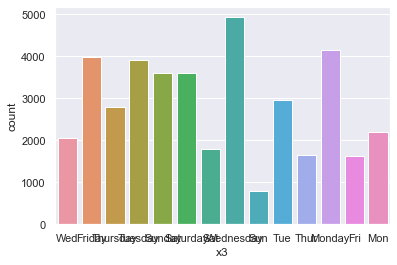

In [100]:
sns.countplot(x='x3', data=cat_df);

In [ ]:
def clean_day_x3_col(date):
    date = date.lower()
    hash_day = {'tue': 'Tuesday', 'mon': 'Monday', 'wed': 'Wednesday'\
                'thur': 'Thursday', 'fri': 'Friday', 'sat': 'Saturday',\
                'sun': 'Sunday'}
    try:
        return hash_day[date]
    except:
        raise('Error in clean_day_x3_col')

In [101]:
cat_df['x3'].value_counts()

Wednesday    4930
Monday       4144
Friday       3975
Tuesday      3915
Sunday       3610
Saturday     3596
Tue          2948
Thursday     2791
Mon          2200
Wed          2043
Sat          1787
Thur         1643
Fri          1620
Sun           798
Name: x3, dtype: int64

C:\Users\NghiTram\anaconda3\envs\kaggleEnv\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


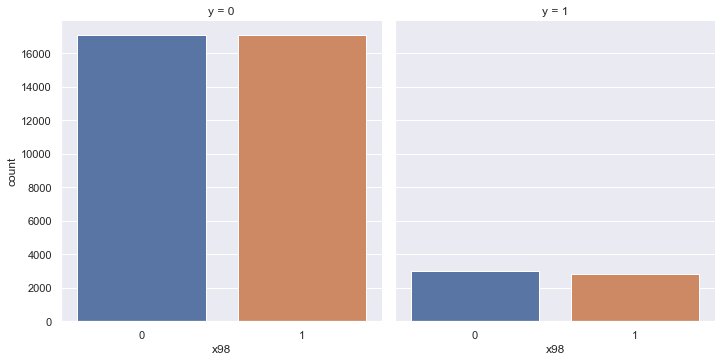

In [61]:
sns.factorplot(x='x98', col='y', kind='count', data=df);